<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Majewska/Klasyfikacja_binarna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [60]:
data = load_breast_cancer()

In [61]:
y = data.target #list(data.target_names)
X = data.data #data.feature_names

In [62]:
num_instances = X.shape[0]
print("Liczba wszystkich przypadków:", num_instances)

Liczba wszystkich przypadków: 569


In [63]:
num_malignant_cases = sum(y)
print("Liczba przypadków raka złośliwego:", num_malignant_cases)

Liczba przypadków raka złośliwego: 357


In [64]:
mean_area = X[:, data.feature_names.tolist().index('mean area')]

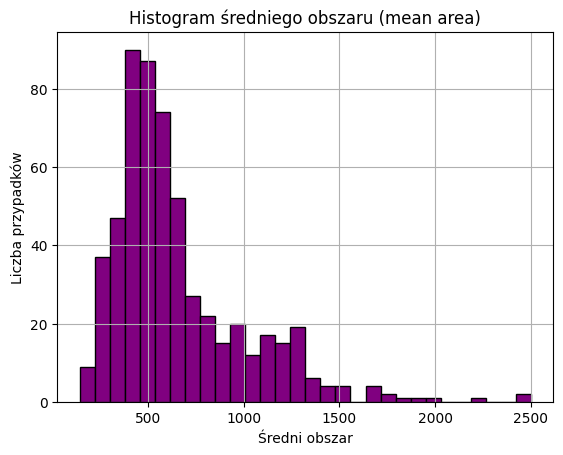

In [65]:
plt.hist(mean_area, bins=30, color='purple', edgecolor='black')
plt.title('Histogram średniego obszaru (mean area)')
plt.xlabel('Średni obszar')
plt.ylabel('Liczba przypadków')
plt.grid(True)
plt.show()

<Axes: xlabel='mean_area', ylabel='y'>

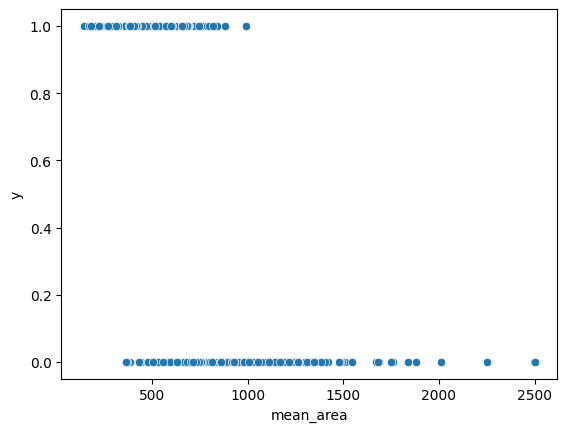

In [66]:
df = pd.DataFrame(data={"mean_area": X[:, data.feature_names.tolist().index('mean area')], 'y': y})
sns.scatterplot(data=df, x="mean_area", y="y")

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [69]:
model = LogisticRegression()

In [70]:
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
y_pred = model.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9824561403508771


In [73]:
y_pred = model.predict(X_test)

In [74]:
cm = confusion_matrix(y_test, y_pred)

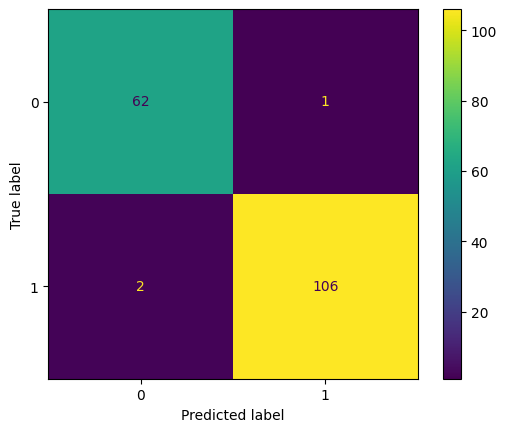

In [87]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [100]:
y_predict_prob_class_1 = model.predict_proba(X_test)[:,1]
y_predict_class = [1 if prob > 0.2 else 0 for prob in y_predict_prob_class_1]

In [76]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

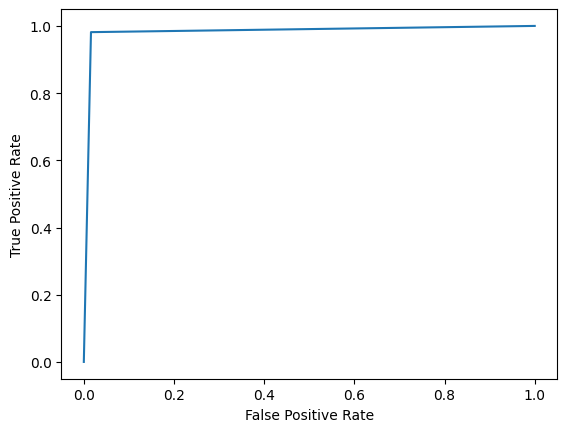

In [77]:
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_disp.plot()
plt.show()

In [96]:
neigh2 = KNeighborsClassifier(n_neighbors=3, metric = "manhattan")
neigh2.fit(X, y)
y_predict_neigh2 = neigh2.predict(X_test)

In [101]:
cm2 = confusion_matrix(y_test, y_predict_class)

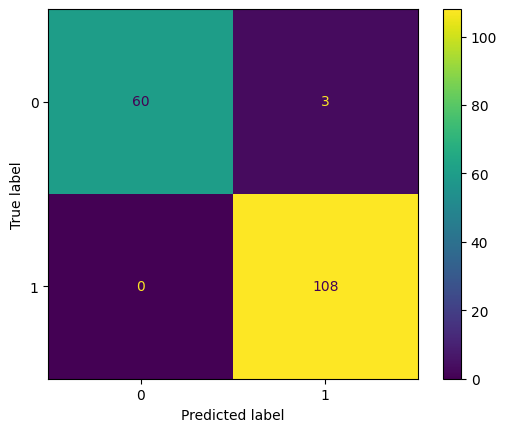

In [102]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=model.classes_)
disp.plot()

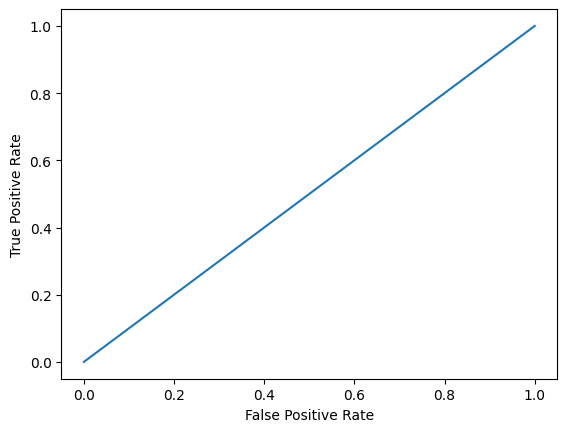

In [108]:
y_scores_neigh2 = neigh2.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test,y_scores_neigh2)

roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_disp.plot()
plt.show()